In [ ]:
# default_exp vis

# Exploration of your data

> This module comprises all the statistical and inference techniques to describe the inner properties of software data. The submodules might include:
>
> - Descriptive statistics
> - Software Metrics
> - Information Theory
> - Learning Principels Detection (Occams' Razor, Biased data, and Data Snooping)
> - Inference: Probabilistic and Causal

In [ ]:
!pip install dit
!pip install sentencepiece

In [ ]:
# export
# Imports
import matplotlib.pyplot as plt
import numpy as np

from ds4se.desc.stats import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
def get_contours(x_range, y_range, delta):
    x = np.arange(x_range[0], x_range[1], delta)
    y = np.arange(x_range[0], x_range[1], delta)
    X, Y = np.meshgrid(x, y)
    Z = X + Y
    
    return X, Y, Z

In [ ]:
#export
def visualize_gt_ngt(gt, ngt, title, y_label):
    plt.title(title)
    plt.xlim(2, 15)
    plt.xlabel('req entropy')
    
    plt.ylim(2, 15)
    plt.ylabel(f'{y_label} entropy')
    plt.gca().set_aspect('equal', adjustable='box')
    
#     xi = np.linspace(2, 10, 10)
#     yi = np.linspace(2, 10, 10)
#     zi = griddata((gt[0], gt[1]), gt[1], (xi[None,:], yi[:,None]), method='linear')
    X, Y, Z = get_contours([1, 16], [1, 16], 1)
    plt.contourf(X, Y, Z, levels = 20, cmap = 'gray')
    
#     plt.tricontour(gt[0], gt[1])
    plt.scatter(ngt[0], ngt[1], c='r', label='non-groundtruth', alpha = 0.5)
    plt.scatter(gt[0], gt[1], c='b', label='groundtruth', alpha = 0.5)
    
    plt.legend()
    plt.show()

In [ ]:
#export
def visualize_events(events, color, title, label):
    plt.title(title)
    maxi, mini, μ, med, σ, med_σ = get_desc_stats(events)
    text = f'Max: {maxi:.3f}\nMin: {mini:.3f}\nMean: {μ:.3f}\nMed: {med:.3f}\nStDev: {σ:.3f}\nMAD: {med_σ:.3f}'
    plt.gcf().text(0.02, 0.35, text, fontsize=14)
    plt.hlines(1,0,1)
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.eventplot(events, orientation='horizontal', colors=color, alpha = 0.5, label=label)
    plt.subplots_adjust(left=0.25)
    plt.legend()
    plt.show()

In [ ]:
#export
def plot_counts(counts, x_label, y_label, top_k = 30):
    labels, values = zip(*counts.most_common()[:top_k])

    indexes = np.arange(len(labels))
    width = 0.5
    plt.figure(num=None, figsize=(22, 4), dpi=60, facecolor='w', edgecolor='k')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.bar(indexes, values, width, align = 'center')
    plt.xticks(indexes, labels)
    plt.show()

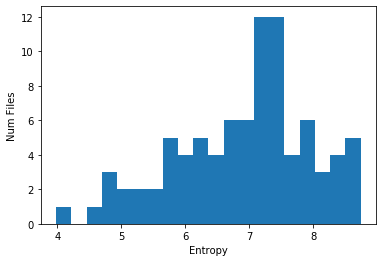

In [ ]:
# Create a histogram of the entropy distribution
plt.hist(LIB_entropies, bins = 20)
plt.ylabel("Num Files")
plt.xlabel("Entropy")
plt.show()

In [ ]:
# export
def vis_3d(gt, ngt, src_dtype, trgt_dtype):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.xlim(1, 15)
    plt.ylim(1, 15)
    ax.scatter(gt[0], gt[1], gt[2], c='b', marker='o')
    ax.scatter(ngt[0], ngt[1], ngt[2], c='r', marker='^')

    ax.set_xlabel(src_dtype)
    ax.set_ylabel(trgt_dtype)
    ax.set_zlabel('Word Mover Distance')
    
    ax.invert_yaxis()
    ax.set_zlim(0, 1)

    plt.show()

In [ ]:
# export
# Uses PCA first and then t-SNE
def reduce_dims(doc_vecs, dims = 2):
    # hyperparameters from https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

    pca = PCA(n_components=30)
    pca_features = pca.fit_transform(doc_vecs)

    tsne = TSNE(n_components=dims, verbose=1, perplexity=40, n_iter=300)
    tsne_features = tsne.fit_transform(doc_vecs)
    
    return tsne_features

In [ ]:
# export
def clusterize_w_entropy(gt_doc_vecs, ngt_doc_vecs, gt_entropies, ngt_entropies):
    gt_reduced_vecs = reduce_dims(gt_doc_vecs)
    ngt_reduced_vecs = reduce_dims(ngt_doc_vecs)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(gt_reduced_vecs[:, 0], gt_reduced_vecs[:, 1], gt_entropies, c='b', marker='o')
    ax.scatter(ngt_reduced_vecs[:, 0], ngt_reduced_vecs[:, 1], ngt_entropies, c='r', marker='^')

#     ax.set_xlabel(src_dtype)
#     ax.set_ylabel(trgt_dtype)
    ax.set_zlabel('Entropy')
    
    ax.invert_yaxis()

    plt.show()

In [ ]:
# hide
from pathlib import Path
import pandas as pd
import numpy as np

def makeArray(text):
    return np.fromstring(text[1:-1],sep=' ')

path = Path('/tf/main/benchmarking/traceability/testbeds/nltk')
req2src = pd.read_csv(path/'libest_req2src.csv')#, dtype={'src_vec': np.float32, 'trgt_vec': np.float32})
req2src['src_vec'] = req2src['src_vec'].apply(makeArray)
req2src['trgt_vec'] = req2src['trgt_vec'].apply(makeArray)
req2src.head()

,src_dtype,trgt_dtype,src_file,trgt_file,src_doc,trgt_doc,src_vec,trgt_vec,wmd,ground_truth
0,req,src,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/source_code/est.h,requir server key generat follow exampl valid ...,file est est public api enrol secur transport ...,"[0.00314126, -0.11988081, -0.28746873, 0.01172...","[-0.01909254, -0.12634756, -0.2693117, 0.01079...",0.340562,0
1,req,src,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/source_code/est...,requir certif less tls mutual authent certif l...,static pthread pthread self void return get cu...,"[0.03502419, -0.11070093, -0.26910967, 0.00777...","[-0.01663938, -0.12135821, -0.279722, 0.009708...",0.410977,0
2,req,src,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/source_code/est...,requir client use implicit databas est client ...,prototyp privat est server part public api voi...,"[0.02980203, -0.11710332, -0.26550922, 0.00489...","[-0.03448066, -0.14800207, -0.26153752, 0.0186...",0.386474,0
3,req,src,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/source_code/est...,requir inform refer idev ieee standard associ ...,libest test api void est log est log level lvl...,"[0.01319338, -0.11533403, -0.2819848, 0.009903...","[-0.04279312, -0.12860508, -0.2682275, 0.00651...",0.447825,0
4,req,src,test_data/LibEST_semeru_format/requirements/RQ...,test_data/LibEST_semeru_format/source_code/est...,requir tls client authent recommend method ide...,tcw err tcw connect tcw sock sock tcw opt opt ...,"[0.03560031, -0.11806617, -0.2603899, 0.008908...","[-0.02559054, -0.11442585, -0.285615, 0.005884...",0.532702,0


In [ ]:
# hide
gt = req2src.loc[req2src.ground_truth == 1]
ngt = req2src.loc[req2src.ground_truth == 0]

[t-SNE] Computing 29 nearest neighbors...
[t-SNE] Indexed 30 samples in 0.000s...
[t-SNE] Computed neighbors for 30 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 30 / 30
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.595665
[t-SNE] KL divergence after 300 iterations: 0.521973
[t-SNE] Computing 69 nearest neighbors...
[t-SNE] Indexed 70 samples in 0.000s...
[t-SNE] Computed neighbors for 70 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 70 / 70
[t-SNE] Mean sigma: 0.073296
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.149498
[t-SNE] KL divergence after 300 iterations: 0.862208


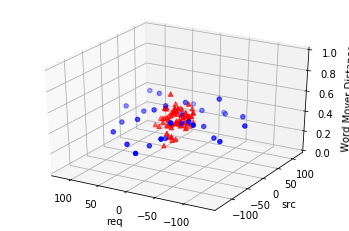

In [ ]:
# hide
clusterize_w_entropy(np.stack(gt.src_vec.to_list()), np.stack(ngt.src_vec.to_list()), gt.wmd.values, ngt.wmd.values)

In [ ]:
from nbdev.export import notebook2script
notebook2script()

Converted 0.0_mgmnt.prep.i.ipynb.
Converted 0.1_mgmnt.prep.conv.ipynb.
Converted 0.2_mgmnt.db.mongo.ipynb.
Converted 0.3_mgmnt.prep.bpe.ipynb.
Converted 0.4_mgmnt.corpus.ipynb.
Converted 0.5_mgmnt.prep.traceability.ipynb.
Converted 0.6_mgmnt.prep.nltk.ipynb.
Converted 1.0_exp.i.ipynb.
Converted 1.1_exp.info-[inspect]-Copy1.ipynb.
Converted 1.1_exp.info-[inspect].ipynb.
Converted 1.1_exp.info.ipynb.
This cell doesn't have an export destination and was ignored:
 
Converted 1.2_exp.csnc.ipynb.
Converted 1.2_exp.gen.code.ipynb.
Converted 1.3_exp.csnc_python.ipynb.
Converted 2.0_repr.i.ipynb.
Converted 2.1_repr.codeberta.ipynb.
Converted 2.1_repr.roberta.train.ipynb.
Converted 2.2_repr.roberta.eval.ipynb.
Converted 2.3_repr.word2vec.train.ipynb.
Converted 2.6_repr.word2vec.eval.ipynb.
Converted 2.7_repr.distmetrics.ipynb.
Converted 3.0_mining.ir.model.ipynb.
Converted 3.0_mining.unsupervised.traceability.ida.ipynb.
Converted 3.1_mining.ir.i.ipynb.
Converted 3.1_mining.unsupervised.traceabil